# SAT vs ACT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Step 1: Load the data and perform basic operations.

##### Load the data in using pandas.

In [2]:
sat = pd.read_csv ('./sat.csv', index_col=0)
act = pd.read_csv ('./act.csv', index_col=0)

##### Print the first ten rows of each dataframe.

In [3]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat.set_index('State')
sat.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [6]:
act.set_index('State')
act.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


##### Describe in words what each variable (column) is.

### Variable Description


#### Shared Variables 
State - Identified state (and in ACT the national average) the data is taken from<br> 
Participation -  Percentage of students in the state's high schools that take the type of test<br>
#### SAT Variables
SAT scores range from (low)200 - 800(high) in each section with a maximum combined score of 1600<br>
<br>
Evidence-Based Reading and Writing (EBRW) - The average score of all participants from the given state on the "Verbal" section <br>
Math - The average score of all participants from the given state on the "Math" section<br>
Total - The combined total of the EBRW score and the Math score<br>
#### ACT Variables
ACT scores range from (low)1 - 36(high) in each section. The composite is the average of the four sections.<br>
<br>
English - The average score of all participants from the given state on the "English" section<br>
Math - The average score of all participants from the given state on the "Math" section<br>
Reading - The average score of all partipants from the given state on the "Reading" section<br>
Science - The average score of all participants from the given state on the "Science" section<br>
Composite - The average score of the prior four test categories

##### Does the data look complete? Are there any obvious issues with the observations?

SAT doesn't have a national average. This will lead to NaN values if they are merged. One issue is that participation is as a percentage which won't be read as numeric when parsing through the data.

##### Print the types of each column.

In [10]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [11]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
# Goes through the named series, removes the '%', changes the string to a float then divides it by 100
sat['Participation'] = sat['Participation'].str.rstrip('%').astype('float') / 100.0 

In [8]:
# Same as above
act['Participation'] = act['Participation'].str.rstrip('%').astype('float') / 100.0

In [14]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [15]:
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [9]:
# Creates a dictionary of the math series to the states (as an index)
sat.set_index('State')['Math'].to_dict

<bound method Series.to_dict of State
Alabama                 572
Alaska                  533
Arizona                 553
Arkansas                594
California              524
Colorado                595
Connecticut             512
Delaware                492
District of Columbia    468
Florida                 497
Georgia                 515
Hawaii                  541
Idaho                   493
Illinois                556
Indiana                 532
Iowa                    635
Kansas                  628
Kentucky                616
Louisiana               586
Maine                   499
Maryland                524
Massachusetts           551
Michigan                495
Minnesota               651
Mississippi             607
Missouri                631
Montana                 591
Nebraska                625
Nevada                  553
New Hampshire           520
New Jersey              526
New Mexico              561
New York                523
North Carolina          535
North Dako

In [11]:
sat.set_index('State')['Evidence-Based Reading and Writing'].to_dict()

{'Alabama': 593,
 'Alaska': 547,
 'Arizona': 563,
 'Arkansas': 614,
 'California': 531,
 'Colorado': 606,
 'Connecticut': 530,
 'Delaware': 503,
 'District of Columbia': 482,
 'Florida': 520,
 'Georgia': 535,
 'Hawaii': 544,
 'Idaho': 513,
 'Illinois': 559,
 'Indiana': 542,
 'Iowa': 641,
 'Kansas': 632,
 'Kentucky': 631,
 'Louisiana': 611,
 'Maine': 513,
 'Maryland': 536,
 'Massachusetts': 555,
 'Michigan': 509,
 'Minnesota': 644,
 'Mississippi': 634,
 'Missouri': 640,
 'Montana': 605,
 'Nebraska': 629,
 'Nevada': 563,
 'New Hampshire': 532,
 'New Jersey': 530,
 'New Mexico': 577,
 'New York': 528,
 'North Carolina': 546,
 'North Dakota': 635,
 'Ohio': 578,
 'Oklahoma': 530,
 'Oregon': 560,
 'Pennsylvania': 540,
 'Rhode Island': 539,
 'South Carolina': 543,
 'South Dakota': 612,
 'Tennessee': 623,
 'Texas': 513,
 'Utah': 624,
 'Vermont': 562,
 'Virginia': 561,
 'Washington': 541,
 'West Virginia': 558,
 'Wisconsin': 642,
 'Wyoming': 626}

In [12]:
sat.set_index('State')['Total'].to_dict()

{'Alabama': 1165,
 'Alaska': 1080,
 'Arizona': 1116,
 'Arkansas': 1208,
 'California': 1055,
 'Colorado': 1201,
 'Connecticut': 1041,
 'Delaware': 996,
 'District of Columbia': 950,
 'Florida': 1017,
 'Georgia': 1050,
 'Hawaii': 1085,
 'Idaho': 1005,
 'Illinois': 1115,
 'Indiana': 1074,
 'Iowa': 1275,
 'Kansas': 1260,
 'Kentucky': 1247,
 'Louisiana': 1198,
 'Maine': 1012,
 'Maryland': 1060,
 'Massachusetts': 1107,
 'Michigan': 1005,
 'Minnesota': 1295,
 'Mississippi': 1242,
 'Missouri': 1271,
 'Montana': 1196,
 'Nebraska': 1253,
 'Nevada': 1116,
 'New Hampshire': 1052,
 'New Jersey': 1056,
 'New Mexico': 1138,
 'New York': 1052,
 'North Carolina': 1081,
 'North Dakota': 1256,
 'Ohio': 1149,
 'Oklahoma': 1047,
 'Oregon': 1108,
 'Pennsylvania': 1071,
 'Rhode Island': 1062,
 'South Carolina': 1064,
 'South Dakota': 1216,
 'Tennessee': 1228,
 'Texas': 1020,
 'Utah': 1238,
 'Vermont': 1114,
 'Virginia': 1102,
 'Washington': 1075,
 'West Virginia': 1086,
 'Wisconsin': 1291,
 'Wyoming': 1230}

##### Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [13]:
col_names = sat.columns
values = sat.values[:,:]

new_dict = {k:v for k,v in zip(col_names, values)}
new_dict

{'Evidence-Based Reading and Writing': array(['Arizona', 0.3, 563, 553, 1116], dtype=object),
 'Math': array(['Arkansas', 0.03, 614, 594, 1208], dtype=object),
 'Participation': array(['Alaska', 0.38, 547, 533, 1080], dtype=object),
 'State': array(['Alabama', 0.05, 593, 572, 1165], dtype=object),
 'Total': array(['California', 0.53, 531, 524, 1055], dtype=object)}

##### Merge the dataframes on the state column.

In [15]:
# Merges two dataframes to one another, while adding SAT/ACT to the new 
sat_act = pd.merge(sat, act, how='left', on='State', suffixes=(' SAT',' ACT')).set_index('State')
sat_act.head()

,Participation SAT,Evidence-Based Reading and Writing,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### Print the minimum and maximum of each numeric column in the data frame.

In [12]:
sat_act.columns

Index(['Participation SAT', 'Evidence-Based Reading and Writing', 'Math SAT',
       'Total', 'Participation ACT', 'English', 'Math ACT', 'Reading',
       'Science', 'Composite'],
      dtype='object')

In [16]:
sat_act.rename(columns = {'Evidence-Based Reading and Writing':'EBRW'}, inplace =True)

In [17]:
sat_act.agg({'Participation SAT':['min','max'],
             'EBRW':['min','max'],
             'Math SAT':['min','max'],
            'Total':['min', 'max'],
            'Participation ACT':['min','max'],
            'English':['min','max'],
             'Math ACT':['min','max'],
             'Reading':['min','max'],
             'Science':['min','max'],
             'Composite':['min','max']
            })

,Participation SAT,EBRW,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
min,0.02,482,468,950,0.08,16.3,18.0,18.1,18.2,17.8
max,1.00,644,651,1295,1.00,25.5,25.3,26.0,24.9,25.5


##### Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [19]:
def stddev(lst):
    mn = np.mean(lst)
    variance = sum([(e-mn)**2 for e in lst]) / len(lst)
    return np.sqrt(variance)

In [20]:
# Locates each index item in the dataframe and then applies the function
sd = []
stdprog = sat_act.iloc[:,1:].apply(stddev) 
sd.append(stdprog)

sd

[EBRW                 45.216970
 Math SAT             46.657134
 Total                91.583511
 Participation ACT     0.318242
 English               2.330488
 Math ACT              1.962462
 Reading               2.046903
 Science               1.722216
 Composite             2.000786
 dtype: float64]

## Step 2: Manipulate the dataframe

##### Turn the list `sd` into a new observation in your dataset.

In [22]:
sat_act_sd = sat_act.append(sd, ignore_index=True)
sat_act_sd.tail(1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5186: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  other = other.loc[:, self.columns]
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Participation SAT,EBRW,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
51,NaN,45.21697,46.657134,91.583511,0.318242,2.330488,1.962462,2.046903,1.722216,2.000786


##### Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [23]:
sat_act.sort_values('Total')
sat_act.head(3)

,Participation SAT,EBRW,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7


##### Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [25]:
sat_50 = sat_act[(sat_act['Participation SAT'] > 0.5)]
sat_50.head(3)

,Participation SAT,EBRW,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
State,,,,,,,,,,
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1


## Step 3: Visualize the data

##### Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms.

<Figure size 432x288 with 0 Axes>

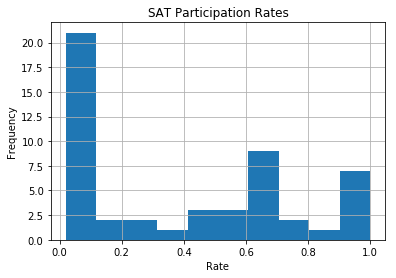

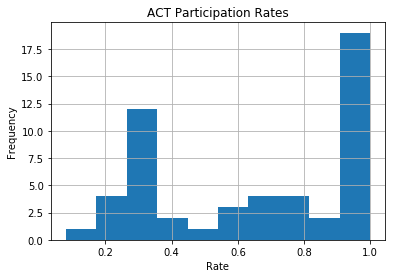

In [30]:
plt.figure(1)
sat.hist(column = 'Participation')
plt.title("SAT Participation Rates")
plt.xlabel("Rate")
plt.ylabel("Frequency")

plt.figure(2)
act.hist(column = 'Participation')
plt.title("ACT Participation Rates")
plt.xlabel("Rate")
plt.ylabel("Frequency")

plt.show()

##### Plot the Math(s) distributions from both data sets.

<Figure size 432x288 with 0 Axes>

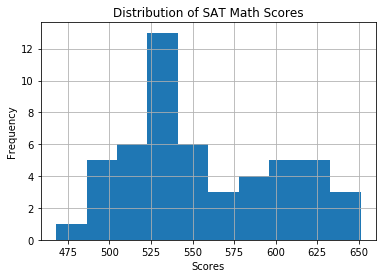

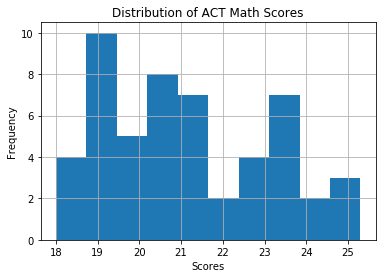

In [31]:
plt.figure(1)
sat.hist(column = 'Math')
plt.title("Distribution of SAT Math Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")

plt.figure(2)
act.hist(column = 'Math')
plt.title("Distribution of ACT Math Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")

plt.show()

##### Plot the Verbal distributions from both data sets.

<Figure size 432x288 with 0 Axes>

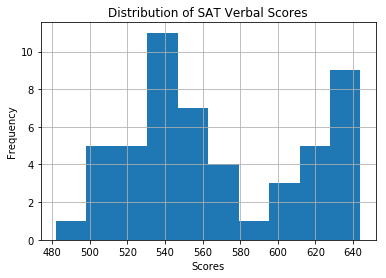

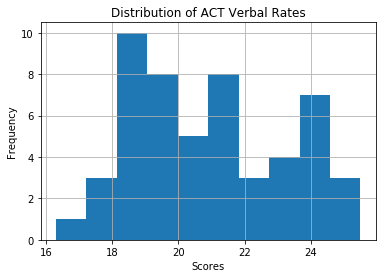

In [32]:
plt.figure(1)
sat.hist(column = 'Evidence-Based Reading and Writing')
plt.title("Distribution of SAT Verbal Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")

plt.figure(2)
act.hist(column = 'English')
plt.title("Distribution of ACT Verbal Rates")
plt.xlabel("Scores")
plt.ylabel("Frequency")

plt.show()

##### When we make assumptions about how data are distributed, what is the most common assumption?

We assume, given enough observations, that data will resemble a normal distribution (equal dispersion around the mean). 

##### Does this assumption hold true for any of our columns? Which?

The SAT Verbal score, centered around 540, most closely resembles a normal curve, if we excluded values from 600+. However, that's given a specific condition that would not make sense to apply, so none of the distributions currently approach normality.

##### Plot some scatterplots examining relationships between all variables.

<Figure size 432x288 with 0 Axes>

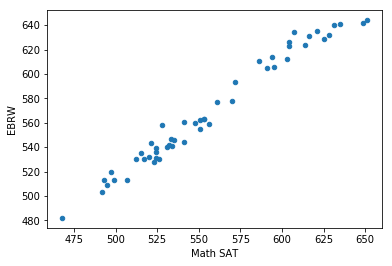

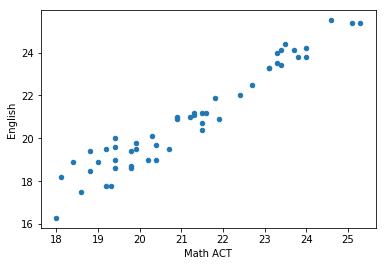

In [33]:
plt.figure(1)
sat_act.plot('Math SAT', 'EBRW', kind='scatter');
plt.figure(2)
sat_act.plot('Math ACT', 'English', kind='scatter');

##### Are there any interesting relationships to note?

There appears to be a positive relationship between the math and verbal scores regardless of the test. The higher the math score, the higher the verbal scorem and vice versa.

##### Create box plots for each variable. 

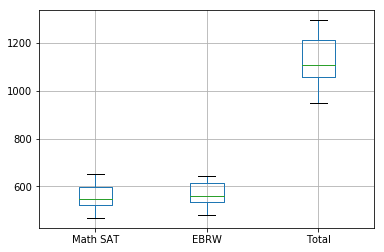

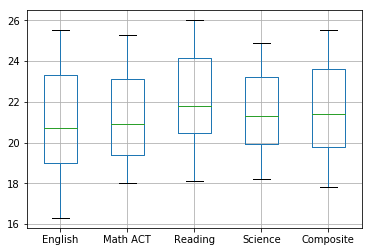

In [34]:
plt.figure(1)
scatter_data_sat = ['Math SAT', 'EBRW', 'Total'] 
scatter_data_act = ['English', 'Math ACT', 'Reading', 'Science', 'Composite']
sat_act.boxplot(scatter_data_sat)
plt.figure(2)
sat_act.boxplot(scatter_data_act)

## Step 4: Descriptive and Inferential Statistics

#####  Summarize each distribution. As data scientists, be sure to back up these summaries with statistics.

In [32]:
sat_act.describe()

,Participation SAT,EBRW,Math SAT,Total,Participation ACT,English,Math ACT,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### Summarize each relationship. Back up these summaries with statistics.

**Participation SAT**: <br>The average value or mean is 0.39. This indicates that, on average, there is a 39.8% participation rate througout all states. <br>The spread of the data, using range, is .98, on a scale from 0.02 - 1.0, so there is a large spread. <br>The middle value or median is 38%, which tells us that there's a positive skew.

**EBRW**: <br>The average value or mean is 569. This indicates that, on average, 569 is the expected average across all states. <br>The standard deviation is 45.67, which tells us that most scores will be within ~91 points of the mean. <br>The middle value or median is 559, which tells us that there's a positive skew.

**Math SAT**: <br>The average score is 547.62. This indicates that, on average, 548 is the expected average across all states. <br>The standard deviation is 84.91, which tells us that most scores will be within 170 points of the mean. <br>The median is 548 so there isn't much of a skew present.

**Total(SAT)**:<br>The average score is 1126.1. This indicates that, on average, 1126 is the expected average across all states. <br>The standard deviation is 92.49, which tells us that most scores will be within 185 points of the mean. <br>The media is 1107 so there isn't a strong skew present.

**Participation ACT**: <br>The mean is 0.65. This indicates that, on average, there is a 65% participation rate througout all states. <br>The spread of the data, using range, is .92, on a scale from 0.08 - 1.0, so there is a large spread. <br>The middle value or median is 69%, which tells us that there's a slight positive skew.

**English(ACT)**: <br>The mean is 20.93. This indicates that, on average, 21 is the expected average score across all states. <br>The standard deviation is 2.35, which tells us that most scores will be within ~5 points of the mean. <br>The median is 20.7 so there isn't really a skew present.

**Math ACT**: <br>The average score is 21.18. This indicates that, on average, 21.18 is the expected average across all states. <br>The standard deviation is 1.98, which tells us that most scores will be within 4 points of the mean. <br>The median is 20.9 so there isn't a strong skew present.

**Reading(ACT)**: <br>The average score is 22.01. This indicates that on average, 22 is the expected average across all states. <br>The standard deviation is 2.06, which tells us that most scores will be within 4 points of the mean. <br>The median is 21.8 so there is not a strong skew present.

**Science(ACT)**: <br>The average score is 21.04. This indicates that on average, 21 is the expected average across all states. <br>The standard deviation is 3.18, which tells us that most scores will be within 8 points of the mean. <br>The median is 21.3, so there is not a strong skew present.

**Composite(ACT)**: <br>The mean is 21.52. This indicates that on average, 21.5 is the expected average across all states. <br>The standard deviation is 2.02

##### Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Interpret your results.

I believe participation rates on each test, on average, are at least 50%. My null hypothesis is $H0:μ ≥ 50\%$ and the alternative hypothesis is that  $HA:μ < 50\%$.

In [35]:
sat_rates = sat.loc[1:52,"Participation"]

In [36]:
stats.ttest_1samp(sat_rates, 0.5)

Ttest_1sampResult(statistic=-1.9041001728617526, pvalue=0.06277761212018848)

Because my p-value is greater than an alpha of 0.05, I fail to reject the null hypothesis and the alternative hypothesis is not true. There is a high likelihood that participation rates on the SAT are at least 50%.

In [35]:
act_rates = act.loc[1:52, "Participation"]

In [36]:
stats.ttest_1samp(act_rates, 0.5)

Ttest_1sampResult(statistic=3.3895126482227993, pvalue=0.0013739138569062615)

Because my p-value is less than an alpha of 0.05, I reject the null hypothesis and the alternative hypothesis is true. It is unlikely that 50% or more participate in the ACT.

##### Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [37]:
stats.t.interval(0.95, len(sat_rates) -1, loc = np.mean(sat_rates), scale = np.std(sat_rates, ddof =1))

(-0.30396220748848357, 1.1139622074884836)

I can say with 95% confidence that any given observation will be between -0.304 and 1.114.

In [38]:
stats.t.interval(0.95, len(act_rates) -1, loc = np.mean(act_rates), scale = np.std(act_rates, ddof =1))

(0.0069812093585757129, 1.2981168298571104)

I can say with 95% confidence that any given observation will be between 0.007 and 1.298.

##### Given your answer earlier, was your answer to the question above surprising? Why?

Given the answer to 26, the answer to 27 was not surprising because I would expect that the SAT's wider distribution would allow for more opportunity for the given value to be within a few standard deviations from the mean.

##### Is it appropriate to generate correlation between SAT and ACT math scores? Why?

It wouldn't be inappropriate to generate correlation between SAT and ACT math scores because they, presumably, test the same levels of mathematics knowledge. I believe it would be fair to assume that the scale of scores between the two tests would mirror one another. 

##### Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

It depends highly on the nature of the relationship we seek to understand. If we are looking for relationships between performance on the tests, on a nationwide scale, then there is merit to conducting statistical inference to attempt to draw some conclusions. However, it can be difficult to make accurate assessments given the highly spread out rates of participation state by state, when comparing test types. In other ways, it wouldn't be sensible to conduct statistical inference on the data available because of it's very singular measurement.

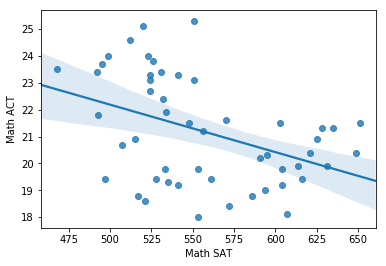

In [37]:
sns.regplot('Math SAT', 'Math ACT', sat_act, fit_reg=True); #Just testing out some plot stuff

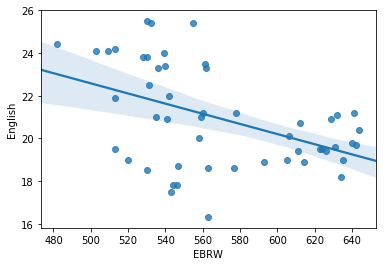

In [38]:
sns.regplot('EBRW', 'English', sat_act, fit_reg=True); #x2

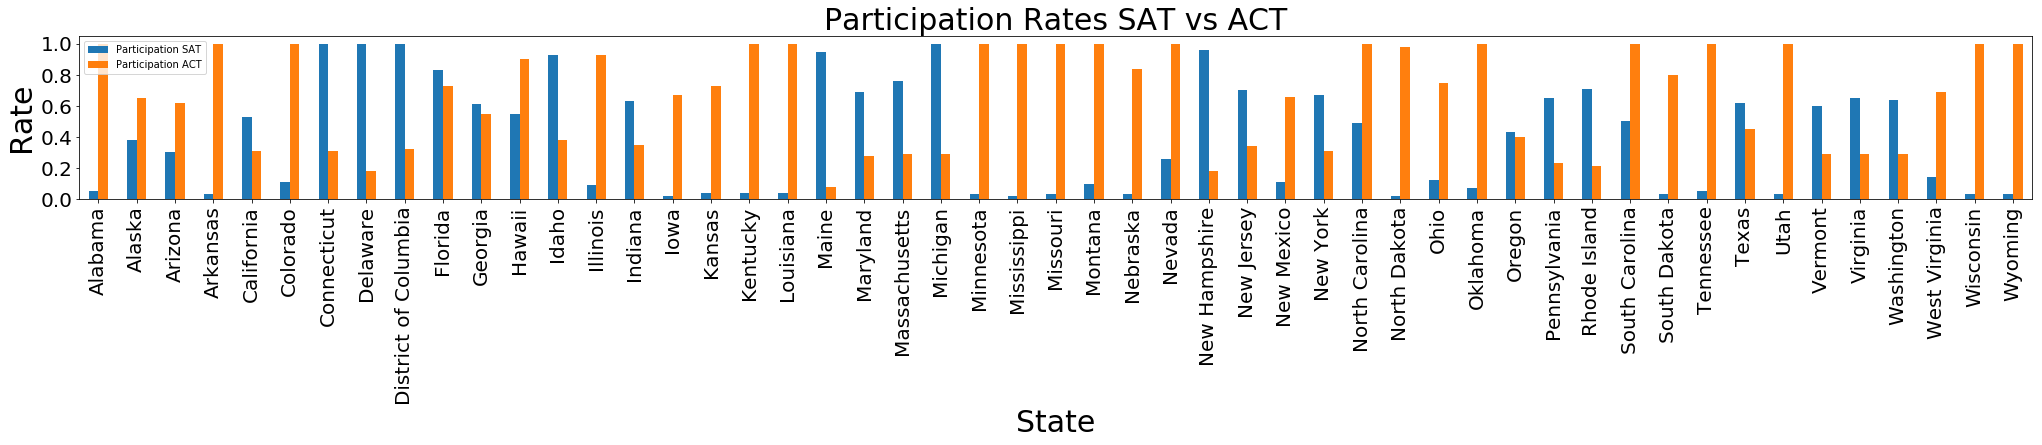

In [31]:
ax = sat_act[['Participation SAT','Participation ACT']].plot(kind='bar',  
                                                             figsize=(35, 3), 
                                                             legend=True, fontsize=20)
ax.set_title('Participation Rates SAT vs ACT',fontsize= 30)
ax.set_xlabel("State", fontsize=30)
ax.set_ylabel("Rate", fontsize=30)
plt.show()